In [1]:
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import skflow

In [2]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [3]:
got_df = pd.read_csv('battles.csv')

In [4]:
got_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
got_df.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,NaN,NaN,NaN,win,siege,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,NaN,NaN,NaN,win,siege,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [6]:
#Years when most number of battles happen
got_df['year'].value_counts()

299    20
300    11
298     7
Name: year, dtype: int64

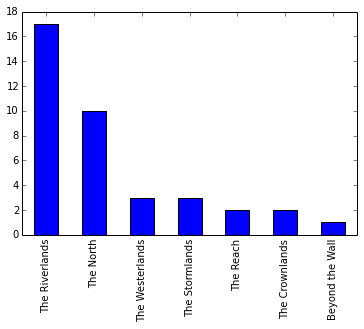

In [7]:
#The region wise war
got_df['region'].value_counts().plot(kind = 'bar')

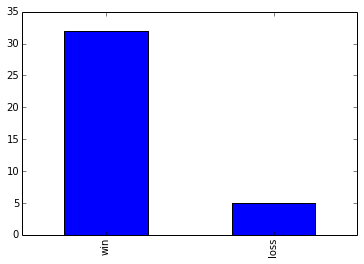

In [8]:
#Result of war 
got_df['attacker_outcome'].value_counts().plot(kind = 'bar')

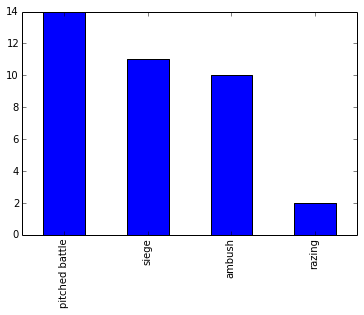

In [9]:
#Types of battles
got_df['battle_type'].value_counts().plot(kind = 'bar')

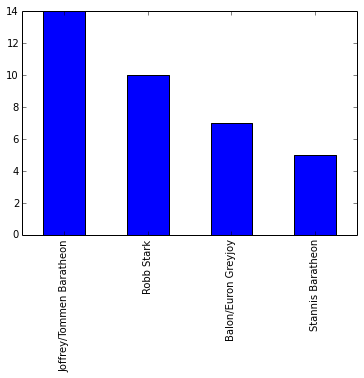

In [10]:
#King attacked most
got_df['attacker_king'].value_counts().plot(kind = 'bar')

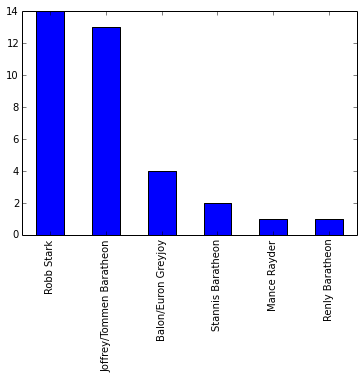

In [11]:
#Most attacked king 
got_df['defender_king'].value_counts().plot(kind = 'bar')

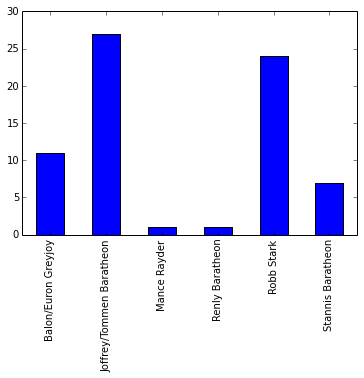

In [12]:
war_action = got_df['defender_king'].value_counts() + got_df['attacker_king'].value_counts()
war_action.fillna(1).plot(kind = 'bar')

/usr/local/lib/python3.4/dist-packages/ggplot/ggplot.py:202: RuntimeWarning: Setting "mpl.rcParams['axes.prop_cycle']=cycler('color', ['#333333', '#348ABD', '#7A68A6', '#A60628', '#467821', '#CF4457', '#188487', '#E24A33'])" raised an Exception: 'axes.prop_cycle is not a valid rc parameter.See rcParams.keys() for a list of valid parameters.'
  warnings.warn(msg, RuntimeWarning)


NameError: name 'unicode' is not defined

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


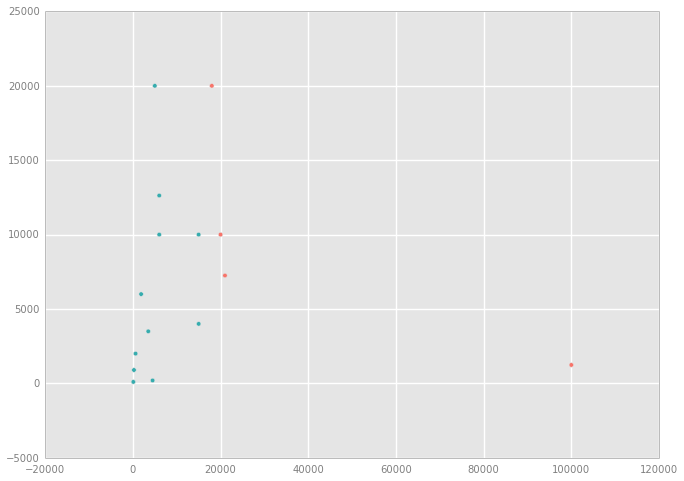

In [15]:
# Create a ggplot scatter plot of attacker_size against defender_size (if not NaN), 
# with the color of each dot being determined by the outcome of the battle
ggplot(aes(x='attacker_size', y='defender_size', colour='attacker_outcome'), 
data=got_df[got_df['attacker_size'].notnull() & got_df['defender_size'].notnull() & got_df['attacker_outcome'].notnull()]) + \
    geom_point()